In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc', 'BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

new_coin_names = ['BTC', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ADA', 'ETH', 'LTC', 'XRP']

NameError: name 'rm' is not defined

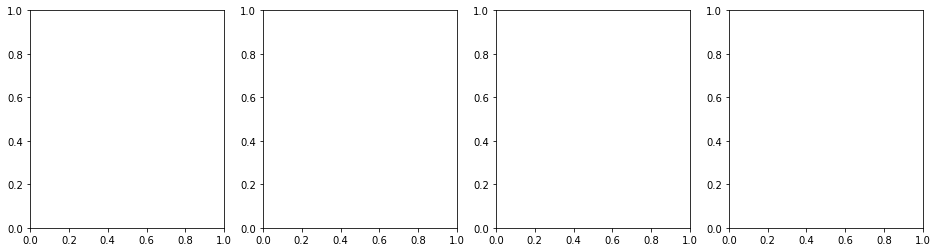

In [4]:
# Example Density Plot
fig, ax = plt.subplots(figsize=(16,4), nrows=1, ncols=4, sharex=True)
ax

examples = ['BBT_Tiingo', 'BBT_future_CRIX', 'BBT_future_BITW20', 'BBT_future_Tiingo_eth']
example_names = ['BTC', 'CRIX', 'BITW20', 'ETH']

for i, rn in enumerate(examples):
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    sns.distplot(df.rs, ax=ax.flat[i], hist=False, kde_kws=dict(linewidth=2.5))
    sns.distplot(df.rh, ax=ax.flat[i], hist=False, kde_kws=dict(linewidth=2.5))
    
    ax.flat[i].set_title(example_names[i])
    ax.flat[i].set_xlabel('daily log return')
    if i != 0:
        ax.flat[i].set_ylabel('')
        
plt.subplots_adjust(hspace=0.05, wspace=0.05)

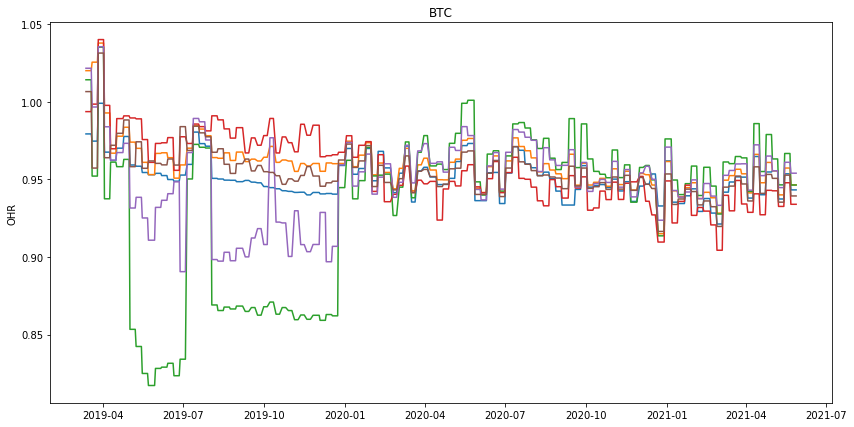

In [16]:
plt.figure(figsize=(42/3, 21/3))
rn = result_names[0]
for rm in risk_measures[:-1]:
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    plt.plot(df.Date, df.h, label=rm)
    
plt.title('BTC')
# plt.legend()
plt.ylabel('OHR')
plt.savefig('BTC_rh.pdf', transparent=True)

In [6]:
risk_measures

['Variance',
 'ES q=0.05',
 'ES q=0.01',
 'VaR q=0.05',
 'VaR q=0.01',
 'ERM k=10',
 'CH']

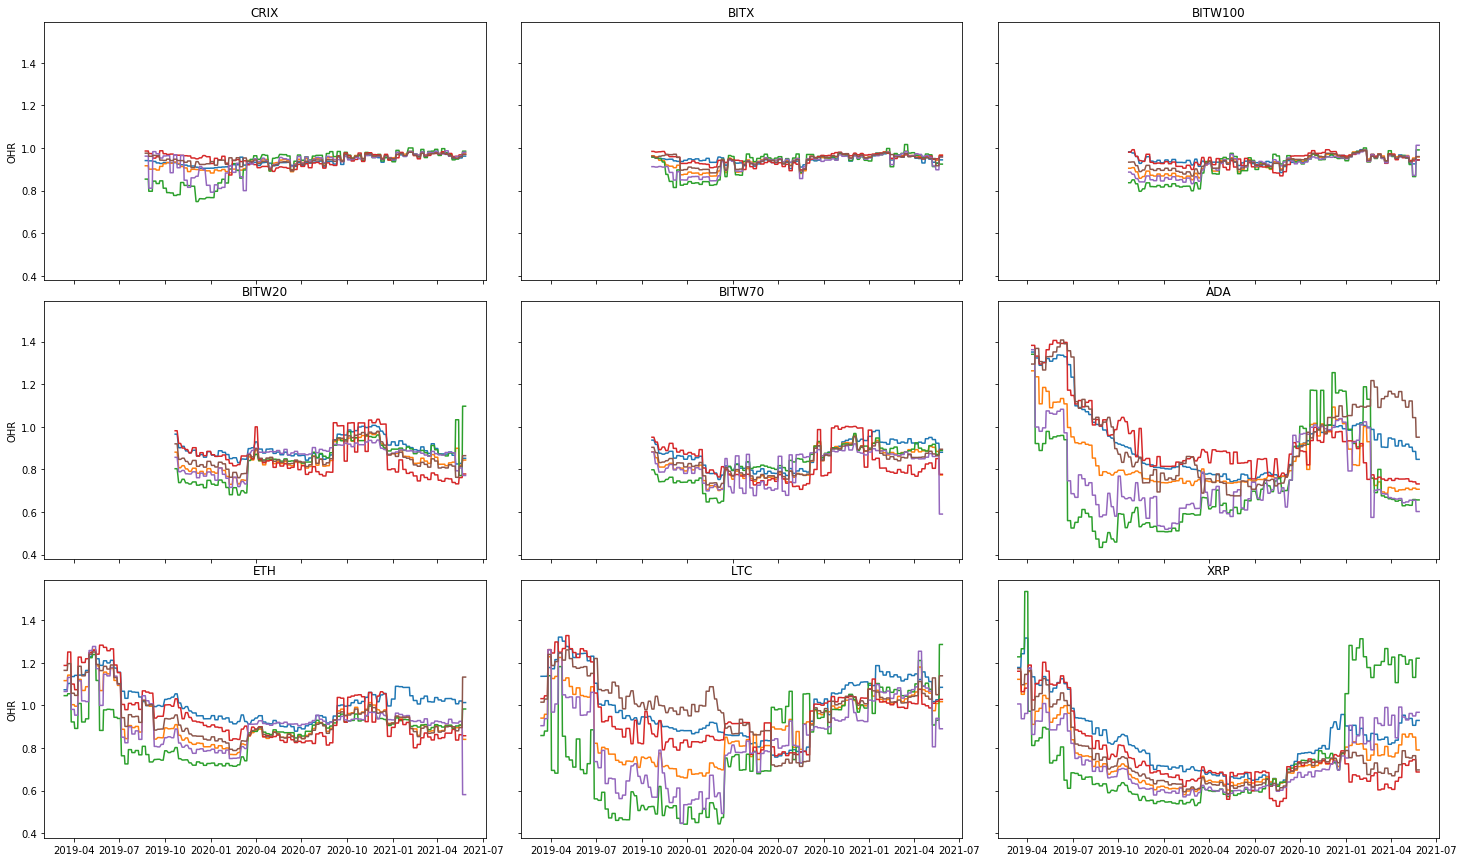

In [7]:
fig, ax = plt.subplots(figsize=(25,15), nrows=3, ncols=3, sharex=True, sharey=True)

for i, rn in enumerate(order[1:]):
#     print(order[i], new_coin_names[i])
    for rm in risk_measures[:-1]:
        path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)
        df = pd.read_csv(path)
        df.Date = pd.to_datetime(df.Date)
        ax.flat[i].plot(df.Date, df.h)
        ax.flat[i].set_title(new_coin_names[i+1])
        
        if i in [0,3,6]:
            ax.flat[i].set_ylabel('OHR')
plt.subplots_adjust(hspace=0.08, wspace=0.08)
plt.savefig('OHRs_timeseries.pdf', transparent=True)


In [12]:
rm_names = ['Variance', 'ES 95%', 'ES 99%', 'VaR 95%', 'VaR 95%', 'ERM', 'CH']
# rn = order[0]
for i, rn in enumerate(order):
    table = pd.DataFrame()
    for rm in risk_measures[:-1]:
        path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)
        df = pd.read_csv(path)
        m1 = np.mean(df.rh)*1000
        m1 = np.round(m1, 4)
        
        m2 = np.std(df.rh)*1000
        m2 = np.round(m2, 4)

        m3 = scipy.stats.skew(df.rh)
        m3 = np.round(m3, 4)
        
        m4 = scipy.stats.kurtosis(df.rh)
        m4 = np.round(m4, 3)
        
        q1 = np.quantile(df.rh, 0.25)*1000
        q1 = np.round(q1, 4)
        
        MD = np.min(df.rh)*1000
        MD = np.round(MD, 4)
        
        row = pd.DataFrame([m1,m2,m3,m4,q1,MD]).T
        row.columns = ['Mean $10^{-3}$', 'Std $10^{-3}$', 'Skew', 'Kurt', 'LQ $10^{-3}$', 'MD $10^{-3}$']
        
        table = table.append(row)

    table.index = rm_names[:-1]
    print(new_coin_names[i])
    print(table)
    print('')

BTC
          Mean $10^{-3}$  Std $10^{-3}$    Skew    Kurt  LQ $10^{-3}$  \
Variance          0.1943         3.9413 -0.9102  11.482       -1.3349   
ES 95%            0.1670         3.9632 -0.8633  11.345       -1.3317   
ES 99%            0.2781         5.3549 -0.4980  17.125       -1.4302   
VaR 95%           0.1895         4.0069 -0.8419  10.977       -1.2719   
VaR 95%           0.1385         4.2483 -1.3014  12.178       -1.4001   
ERM               0.1948         3.9138 -0.8949  11.867       -1.2785   

          MD $10^{-3}$  
Variance      -31.7121  
ES 95%        -31.8155  
ES 99%        -42.2512  
VaR 95%       -31.9426  
VaR 95%       -31.6358  
ERM           -31.8969  

CRIX
          Mean $10^{-3}$  Std $10^{-3}$    Skew    Kurt  LQ $10^{-3}$  \
Variance          0.7688         8.9103  0.0223  14.763       -3.6348   
ES 95%            0.7325         8.9257  0.0443  14.050       -3.7453   
ES 99%            0.7521         9.2387 -0.0205  12.471       -3.5492   
VaR 95%    

In [9]:
rm_names = ['Variance', 'ES 95%', 'ES 99%', 'VaR 95%', 'VaR 95%', 'ERM', 'CH']
# rn = order[0]
for i, rn in enumerate(order):
    table = pd.DataFrame()
    for rm in risk_measures[:-1]:
        path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)
        df = pd.read_csv(path)
        m1 = np.mean(df.rh)*1000
        m1 = np.round(m1, 4)
        
        m2 = np.std(df.rh)*1000
        m2 = np.round(m2, 4)

        m3 = scipy.stats.skew(df.rh)
        m3 = np.round(m3, 4)
        
        m4 = scipy.stats.kurtosis(df.rh)
        m4 = np.round(m4, 3)
        
        q1 = np.quantile(df.rh, 0.25)*1000
        q1 = np.round(q1, 4)
        
        MD = np.min(df.rh)*1000
        MD = np.round(MD, 4)
        
        row = pd.DataFrame([m1,m2,m3,m4,q1,MD]).T
        row.columns = ['Mean', 'Std', 'Skew', 'Kurt', 'LQ', 'MD']
        
        table = table.append(row)

    table.index = rm_names[:-1]
    print(new_coin_names[i])
#     print(table)
    print(table.to_latex())
    print('')

BTC
\begin{tabular}{lrrrrrr}
\toprule
{} &    Mean &     Std &    Skew &    Kurt &      LQ &       MD \\
\midrule
Variance &  0.1943 &  3.9413 & -0.9102 &  11.482 & -1.3349 & -31.7121 \\
ES 95\%   &  0.1670 &  3.9632 & -0.8633 &  11.345 & -1.3317 & -31.8155 \\
ES 99\%   &  0.2781 &  5.3549 & -0.4980 &  17.125 & -1.4302 & -42.2512 \\
VaR 95\%  &  0.1895 &  4.0069 & -0.8419 &  10.977 & -1.2719 & -31.9426 \\
VaR 95\%  &  0.1385 &  4.2483 & -1.3014 &  12.178 & -1.4001 & -31.6358 \\
ERM      &  0.1948 &  3.9138 & -0.8949 &  11.867 & -1.2785 & -31.8969 \\
\bottomrule
\end{tabular}


CRIX
\begin{tabular}{lrrrrrr}
\toprule
{} &    Mean &     Std &    Skew &    Kurt &      LQ &       MD \\
\midrule
Variance &  0.7688 &  8.9103 &  0.0223 &  14.763 & -3.6348 & -71.0246 \\
ES 95\%   &  0.7325 &  8.9257 &  0.0443 &  14.050 & -3.7453 & -69.8938 \\
ES 99\%   &  0.7521 &  9.2387 & -0.0205 &  12.471 & -3.5492 & -70.2030 \\
VaR 95\%  &  0.8476 &  8.8835 &  0.0806 &  14.202 & -3.6750 & -69.7436 \\
VaR 95

In [10]:
print(table.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &    Mean &      Std &    Skew &    Kurt &       LQ &        MD \\
\midrule
Variance & -1.9087 &  65.2591 &  1.1831 &  21.605 & -23.5520 & -525.2360 \\
ES 95\%   & -1.6368 &  64.6722 &  1.2248 &  22.287 & -22.8830 & -525.6981 \\
ES 99\%   & -1.5243 &  65.1684 &  1.2394 &  22.097 & -23.2401 & -525.6996 \\
VaR 95\%  & -1.7582 &  65.2438 &  1.1665 &  21.493 & -23.4130 & -525.6673 \\
VaR 95\%  & -1.4074 &  64.6029 &  1.2587 &  22.457 & -23.1024 & -525.7274 \\
ERM      & -1.7083 &  64.9295 &  1.1923 &  21.932 & -22.8506 & -525.6895 \\
\bottomrule
\end{tabular}



In [15]:
rm_names = ['ERM']
# rn = order[0]
table = pd.DataFrame()
for i, rn in enumerate(order):
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    df = pd.read_csv(path)
    m1 = np.mean(df.rh)*1000
    m1 = np.round(m1, 4)

    m2 = np.std(df.rh)*1000
    m2 = np.round(m2, 4)

    m3 = scipy.stats.skew(df.rh)
    m3 = np.round(m3, 4)

    m4 = scipy.stats.kurtosis(df.rh)
    m4 = np.round(m4, 3)

    q1 = np.quantile(df.rh, 0.25)*1000
    q1 = np.round(q1, 4)

    MD = np.min(df.rh)*1000
    MD = np.round(MD, 4)

    row = pd.DataFrame([m1,m2,m3,m4,q1,MD]).T
    row.columns = ['Mean', 'Std', 'Skew', 'Kurt', 'LQ', 'MD']

    table = table.append(row)

table.index = new_coin_names
print(new_coin_names[i])
#     print(table)
print(table.to_latex())
print('')

XRP
\begin{tabular}{lrrrrrr}
\toprule
{} &    Mean &      Std &    Skew &    Kurt &       LQ &        MD \\
\midrule
BTC     &  0.1948 &   3.9138 & -0.8949 &  11.867 &  -1.2785 &  -31.8969 \\
CRIX    &  0.8048 &   8.8261 &  0.0677 &  14.939 &  -3.6619 &  -70.5299 \\
BITX    &  0.5896 &  10.0776 & -0.4427 &  13.084 &  -3.5729 &  -78.5815 \\
BITW100 &  0.8526 &  12.0317 & -1.6522 &  20.556 &  -4.2111 & -111.8459 \\
BITW20  &  2.5642 &  36.0091 & -0.3446 &   4.215 & -13.5096 & -215.9201 \\
BITW70  &  2.8181 &  39.0745 & -0.6952 &   4.874 & -16.0984 & -245.2498 \\
ADA     &  1.3983 &  54.0242 &  1.0344 &   4.201 & -26.5629 & -194.0610 \\
ETH     &  1.0541 &  37.9113 &  0.8743 &   6.759 & -17.0680 & -188.7288 \\
LTC     & -2.0647 &  42.7759 & -0.0729 &   5.628 & -22.2628 & -280.8793 \\
XRP     & -1.7083 &  64.9295 &  1.1923 &  21.932 & -22.8506 & -525.6895 \\
\bottomrule
\end{tabular}


